# Visualisation

In [37]:
import pandas as pd

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Loading the index dataset

In [39]:
lcdi_df = pd.read_csv('lcdi/lcdi_index.csv')
lcdi_df.head()

,rank,country,region,environmental_score,socioeconomic_score,governance_score,lcdi
0,1,Norway,WEOG,0.885,0.966,0.983,0.928
1,2,Sweden,WEOG,0.895,0.952,0.983,0.927
2,3,Iceland,WEOG,0.888,0.959,0.983,0.926
3,4,Finland,WEOG,0.885,0.942,0.965,0.916
4,5,Liechtenstein,WEOG,0.879,0.942,0.965,0.913


In [40]:
lcdi_df_index = lcdi_df[["rank", "country", "lcdi"]]
lcdi_df_index

,rank,country,lcdi
0,1,Norway,0.928
1,2,Sweden,0.927
2,3,Iceland,0.926
3,4,Finland,0.916
4,5,Liechtenstein,0.913
5,6,Switzerland,0.906
6,7,Denmark,0.903
7,8,New Zealand,0.898
8,9,Austria,0.897
9,10,Estonia,0.893


In [41]:
avg_scores_lcdi = lcdi_df.groupby('region').agg({
    'environmental_score': 'mean',
    'socioeconomic_score': 'mean',
    'governance_score': 'mean',
    'lcdi': 'mean'
}).reset_index()

avg_scores_lcdi

,region,environmental_score,socioeconomic_score,governance_score,lcdi
0,African Group,0.870333,0.557037,0.880352,0.754037
1,Asia-Pacific Group,0.809000,0.720345,0.867218,0.782964
2,Eastern European Group,0.834391,0.827391,0.931957,0.844000
3,GRULAC,0.847375,0.750000,0.960344,0.825000
4,WEOG,0.823962,0.931385,0.962615,0.881423


In [42]:
import matplotlib.pyplot as plt

In [43]:
regions = avg_scores_lcdi['region']
lcdi = avg_scores_lcdi['lcdi']
environmental_scores = avg_scores_lcdi['environmental_score']
socioeconomic_scores = avg_scores_lcdi['socioeconomic_score']
governance_scores = avg_scores_lcdi['governance_score']

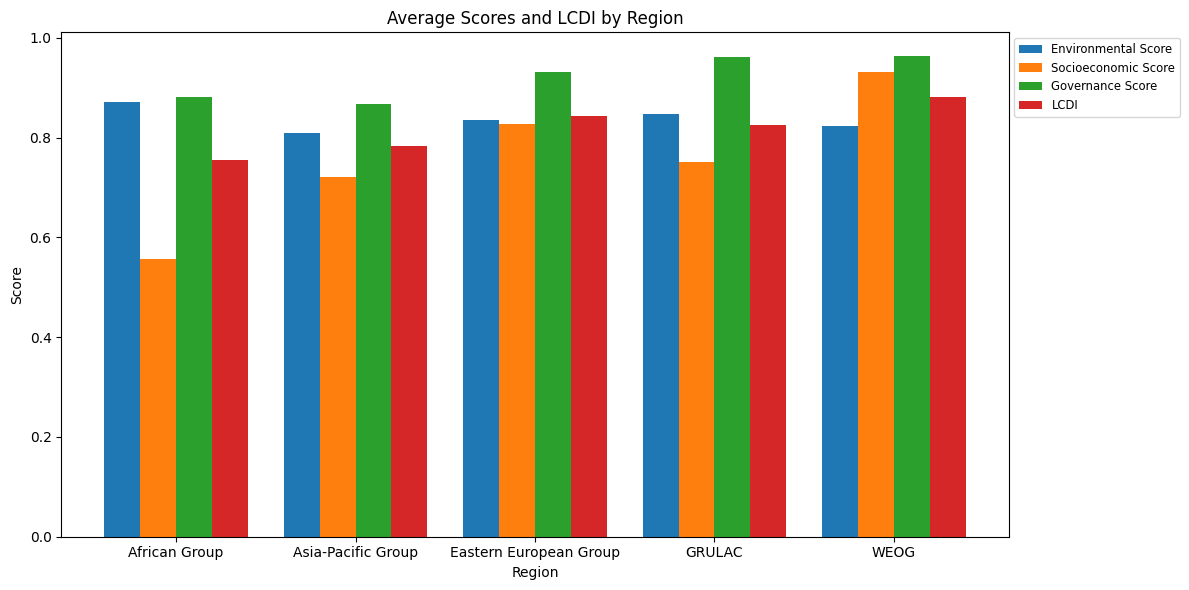

In [53]:
plt.figure(figsize=(12, 6))

bar_width = 0.2
index = range(len(regions))
plt.bar(index, environmental_scores, width=bar_width, label='Environmental Score')
plt.bar([i + bar_width for i in index], socioeconomic_scores, width=bar_width, label='Socioeconomic Score')
plt.bar([i + bar_width*2 for i in index], governance_scores, width=bar_width, label='Governance Score')
plt.bar([i + bar_width*3 for i in index], lcdi, width=bar_width, label='LCDI')

plt.xlabel('Region')
plt.ylabel('Score')
plt.title('Average Scores and LCDI by Region')
plt.xticks([i + 1.5 * bar_width for i in index], regions)
plt.legend(fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()